In [1]:
import pandas as pd
import os

### Merging 12 months of different Sales Data file into one

In [2]:
os.getcwd()

'C:\\Users\\Saurav Akhouri\\Desktop\\Data Science ML AI\\Practice\\Data Science Practice\\Sales Analysis'

In [3]:
#opening a single file to view one month data
testdf=pd.read_csv('.\\Pandas Data Science Tasks master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv')
#current working directory by command ./ or .\\ concatenated along with the path of the data folder

testdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#listing all the files in the data folder 

#using list comprehension
files=[file for file in os.listdir("./Pandas Data Science Tasks master/SalesAnalysis/Sales_Data") ]


for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
# Merging Data

all_month_data=pd.DataFrame()  #Create empty data frame to store all months data after merging


#reading each file name one at a time and then appending it to the all month data frame
for file in files:
    df=pd.read_csv(".\\Pandas Data Science Tasks master\\SalesAnalysis\\Sales_Data\\"+file)
    all_month_data=pd.concat([all_month_data,df])
    
all_month_data.head()

#creating a new csv for the merged data from the all_month dataframe

all_month_data.to_csv("All_Data.csv",index=False)

In [6]:
#Creating a new dataframe directly from the new file created in the above step.
All_Data= pd.read_csv("All_data.csv")
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up the Data

In [7]:
All_Data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

###### Drop rows of NaN values

In [8]:
#Checking the data were NaN Values are there
All_Data[All_Data.isna().any(axis=1)]  # any() Returns whether any element is True, potentially over an axis.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#deleting NaN values from original DataFrame

#we want to drop the entire row if all values are Na hence using 'all' option in how
All_Data=All_Data.dropna(how='all') #'all' : If all values are NA, drop that row or column.
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Question 1. What was the best month for sales? How much was earned that month?

### Augment Data with some additional Columns
To solve above question, we will proceed one step at a time

#### 1) Add a month column 
we need month column to identify the months as there is no seperate column for months

In [10]:
#taking first two character from order date columns values to create a new/custom month column
All_Data['Month']=All_Data['Order Date'].str[0:2]  
All_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
#Converting the Custom Month column to numeric from string

All_Data['Month']=All_Data['Month'].astype('int32')

# ValueError: invalid literal for int() with base 10: 'Or' 
#Getting a Value error when trying to convert Month column to Int which means we have 'Or somewhere in the month column'



ValueError: invalid literal for int() with base 10: 'Or'

######  Finding where the error is and deleting it

In [12]:
All_Data[All_Data['Order Date'].str[0:2]=='Or']

# we find that there are 355 rows where column is duplicated as data, hence we have to delete them

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [13]:
#Deleting the rows with column names by keeping only the valid data

All_Data=All_Data[All_Data['Order Date'].str[0:2]!='Or']

###### Converting the Custom Month column to numeric from string after cleaning the data

In [14]:
#Converting the Custom Month column to numeric from string

All_Data['Month']=All_Data['Month'].astype('int32')
All_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### 2) Add a Sales column 
Since we don't have sales column hence we make a new sales column by multiplying price each * quantity

In [15]:
All_Data['Sales']=All_Data['Quantity Ordered']*All_Data['Price Each']

# We get a TypeError: can't multiply sequence by non-int of type 'str' which means we have a non int column


TypeError: can't multiply sequence by non-int of type 'str'

###### Finding the data info to check which column are string and then convert it to numerical

In [16]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


Converting Data to numerical (using either .astype option or pd.to_numeric)

In [17]:
# Converting Data to numerical

# All_Data['Quantity Ordered']=All_Data['Quantity Ordered'].astype('int32')
# All_Data['Price Each']=All_Data['Price Each'].astype('float64')

# Alternative to convert data type to numberic using pandas without specifying int or float is using below
All_Data['Quantity Ordered']=pd.to_numeric(All_Data['Quantity Ordered'])
All_Data['Price Each']=pd.to_numeric(All_Data['Price Each'])


#rechecking info to confirm if datatype has been chnaged to int and float
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [18]:
# Finally creating a Sales Column

All_Data['Sales']=All_Data['Quantity Ordered']*All_Data['Price Each']
All_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Question 1. What was the best month for sales? How much was earned that month?

In [19]:
# since we have done all the cleaning and preprocessing to answer the above question, let's solve the Q using group by

All_Data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


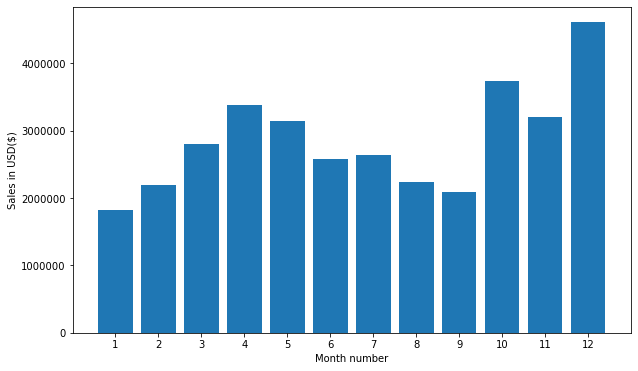

In [20]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,6))
Sales=All_Data.groupby('Month').sum()['Sales']
Months=range(1,13)
plt.bar(Months, Sales)
plt.xticks(Months)
plt.ylabel('Sales in USD($)')
plt.ticklabel_format(style='plain')  # to remove scientific notation from the y axis
plt.xlabel('Month number')
plt.show()

# Answer 1: 
# Based on the graph and the data, we can easily conclude that December is the best month in terms of sales
# and the sales done was over 4.61 Million USD ($)

#### Question 2: Which city had the highest number of Sales?

#### 3) Add City Column

In [21]:
# All_Data.head()

#using .apply method to run a function on a dataframe
#we notice that the city name is there on purchase address column and is surrounded by commas

# All_Data['City']=All_Data['Purchase Address'].apply(lambda x:x.split(',')[1]) #split by ',' and return 1st index
# All_Data.head()

# Alternatively we can also do the above command by defining a function and then use the .apply method to use any function

def get_city(address):
    return address.split(',')[1]   #split by ',' and return 1st index

All_Data['City']=All_Data['Purchase Address'].apply(lambda x:get_city(x)) 
All_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [22]:
#since in some US cities, different states have same city name, hence we also take in the state name from address

def get_state(address):
    return address.split(',')[2].split(' ')[1] #splitting by ',' & grabbing 2nd index then splitting by space & 1st index\

All_Data['City']=All_Data['Purchase Address'].apply(lambda x: get_city(x) +' ('+ get_state(x) +')')

#Alternatively we can also use f string to format that state without using + sign
# All_Data['City']=All_Data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({ get_state(x) })")

All_Data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [23]:
All_Data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


<function matplotlib.pyplot.show(*args, **kw)>

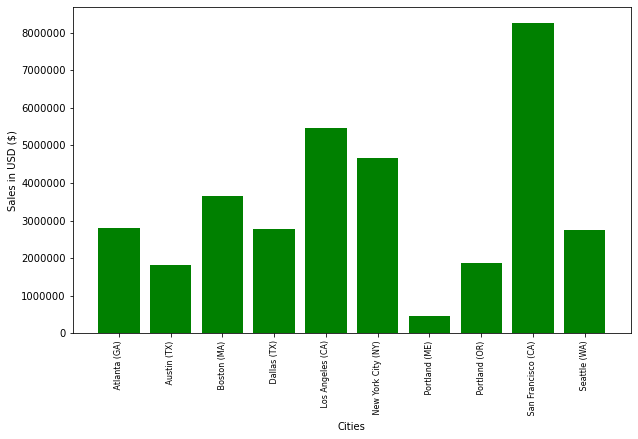

In [24]:
plt.subplots(figsize=(10,6))

Results= All_Data.groupby('City').sum()


# City=All_Data['City'].unique() 

#Used for finding out Unique cities, however this reorders that value and hence it would not match the Sales data
# So intead of the unique() method, we will use list comrehension and group by to find out city

Cities= [city for city, df in All_Data.groupby('City')] # need to different paramters city and df

plt.bar(Cities,Results['Sales'],color='g')

plt.xticks(Cities,rotation='vertical',size=8)
plt.xlabel("Cities")
plt.ylabel("Sales in USD ($)")

plt.ticklabel_format(style='plain', axis='y')
plt.show

#Answer 2:
# Hence San Francisco has the highest number of Sales

#### Question 3: What time should we display advertisements to maximize likelihood of customers buying product? 

In [25]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [26]:
# We will have to extract time from the Order Date field to understand the order distribution based on time
# So we convert Order Date into datetime object which is currently a string

All_Data['Order Date']=pd.to_datetime(All_Data['Order Date'])
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [27]:
All_Data['Hour']=All_Data['Order Date'].dt.hour
All_Data['Minute']=All_Data['Order Date'].dt.minute
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [28]:
hours=[hour for hour,df in All_Data.groupby('Hour')]
All_Data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


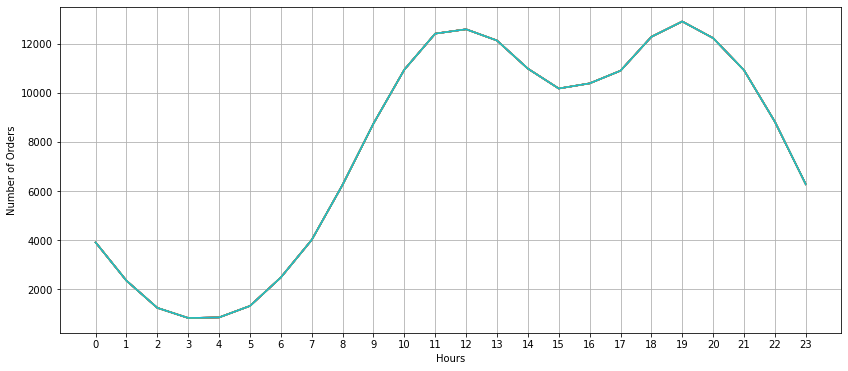

In [43]:
plt.subplots(figsize=(14,6))
plt.plot(All_Data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# Answer 3:
# The plot shows the highest Sales around 12pm and 7pm(19hours), hence advertisements should be should be displayed 
# around that time or just before that around 11pm and 6pm

#### Question 4: What Products are most often sold together?

In [55]:
# We need to find duplicate Order Ids, to check the products that are bought together 
dup_All_Data=All_Data[All_Data['Order ID'].duplicated(keep=False)] #Keep =False keeps only duplicates
dup_All_Data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [56]:
# Now we will show all the products for a single order id together in a new column

dup_All_Data['All Products']=dup_All_Data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
#creating new column using trasform to join the different products together and seperated by comma
dup_All_Data.head(5)

#Now we can see this is done for all duplicated items, for eg row 3 and 4 is same. So we need to get rid of duplicates
# So there needs to be one row for each order id as we have already created new column for all products.

<ipython-input-56-8ece0b403f75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_All_Data['All Products']=dup_All_Data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,All Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [58]:
# we'll drop the duplicated rows and alos keep only the columns that we need

dup_All_Data=dup_All_Data[['Order ID','All Products']].drop_duplicates()
dup_All_Data

,Order ID,All Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [67]:
# Now we have to  count the occurence of product pairs and see which two items are most often sold together

from itertools import combinations
from collections import Counter

count=Counter()

for row in dup_All_Data['All Products']:
    row_list=row.split(',') #creating a list for all the products
    count.update(Counter(combinations(row_list,2))) # to check in group of 2 items sold together
count.most_common(10) # most_common method comes with the Counter object

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [68]:
# for better viewing/more readable we can show as dictionary

for key,value in count.most_common(10):
    print(key,value)

# So from this data we can understand that the following items are mostly bought together.
# Hence using this information business could offer smart deals/discount on items bought together to boost up the sales
# and attract customers

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What products sold the most? Why do you think it sold the most?

In [69]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [72]:
# to answer the above question we first have to add up the quantity ordered by grouping by the Product

Product_Group=All_Data.groupby('Product')
Product_Group.sum()

# Plotting the below data on graph would make it clearer which product sold the most

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


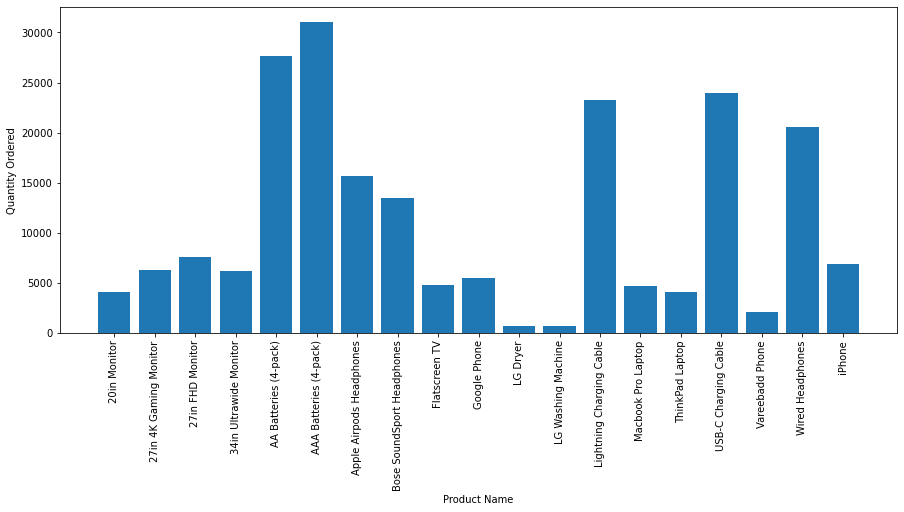

In [124]:
plt.subplots(figsize=(15,6))

Quantity_Ordered=Product_Group.sum()['Quantity Ordered']
Products= [product for product, df in Product_Group]

plt.bar(Products,Quantity_Ordered)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.xticks(Products,rotation='vertical',size=10)
plt.show()


#AAA Batteries are sold the most followed by AA batteries

In [101]:
# now answering why these items sold the most
# the first hypothesis might be because the items sold the most are accessories and hence their prices are lower
# while the items sold the lowest are main items and hence expensive

# to prove the hypthesis, we will try to overlay our graph with the prices and check whether there is direct correlation
# between the prices and the ordered quantity

Prices=All_Data.groupby('Product').mean()['Price Each']  # finding the avg/mean prices of each item
print(Prices)



Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


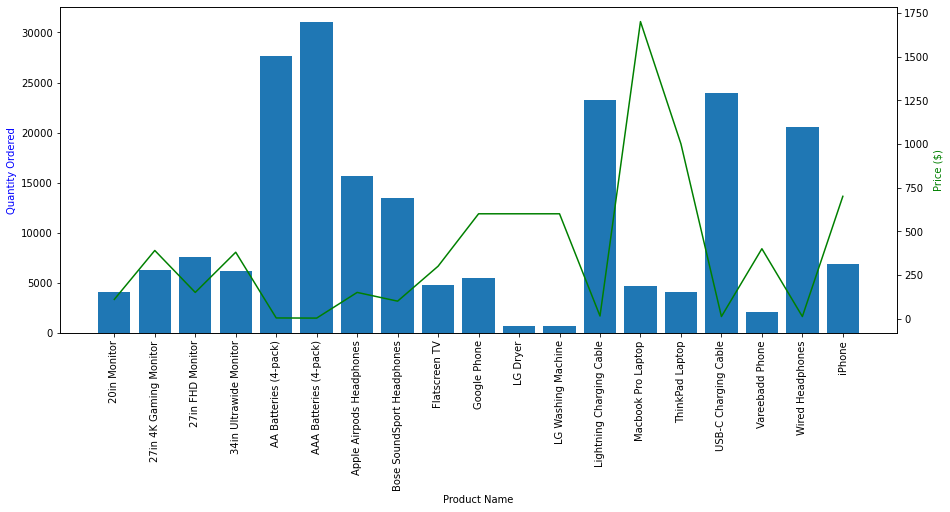

In [123]:
# now we will plot the prices by creating a secondary axis in the same graph as above to check the correlation

fig,ax1=plt.subplots(figsize=(15,6))

ax2=ax1.twinx() 

ax1.bar(Products,Quantity_Ordered)
ax2.plot(Products,Prices,'g-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Price ($)',color='g')
ax1.set_xticklabels(Products,rotation='vertical',size=10)
plt.show()


# So as we see the dual axis graph, it is evident that prices actually play a role in the number of products solds
# However there might be some inconsistencies as macbook and thinkpad are sold more than
# LG Dryer and washing machine even though the prices are way more. 
# But a single factor can't give us the entire picture however it gives an overall picture of the trend.

In [125]:
#In addition to the above graph, finding the correlation between the price and quanitity ordered

All_Data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [163]:

print(Quantity_Ordered)
print(Prices)



Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.

In [161]:
df=pd.DataFrame()
df['Quantity']= Quantity_Ordered
df['Price']=Prices
df

,Quantity,Price
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


In [162]:
#Using the correlation function to see if the two variables are correlated.

df.corr()

#As proved earlier from the graph, Quantity Ordered and Prices are 60% negatively correlated

,Quantity,Price
Quantity,1.000000,-0.601443
Price,-0.601443,1.000000


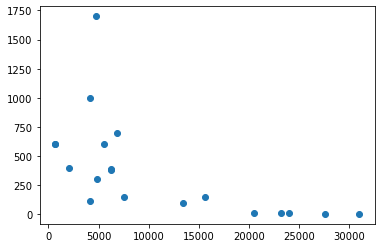

In [165]:
plt.scatter(df.Quantity,df.Price)